- https://github.com/Lornatang/GoogLeNet-PyTorch/blob/master/googlenet_pytorch/model.py
- https://pytorch.org/vision/stable/models.html
- HW1 PartD

In [3]:
#import torchvision.models as models
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from itertools import combinations 

In [4]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

# Load the pretrained model
model = models.googlenet(pretrained=True)

# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

### Using PyTorch

In [5]:
import torch
from googlenet_pytorch import GoogLeNet

In [69]:
#pip install googlenet_pytorch

In [6]:
model = GoogLeNet.from_pretrained('googlenet')

Loaded pretrained weights for googlenet


In [3]:
# ... image preprocessing as in the classification example ...
inputs = torch.randn(1, 3, 224, 224)
print(inputs.shape) # torch.Size([1, 3, 224, 224])

features = model.extract_features(inputs)
print(features.shape) # torch.Size([1, 1024, 7, 7])

torch.Size([1, 3, 224, 224])
torch.Size([1, 1024, 1, 1])


In [7]:
# Load Images
from PIL import Image

# Open Image
#input_image = Image.open('/Images/Cardinal_0010_18894.jpg')
input_image = Image.open('/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Images/Cardinal_0010_18894.jpg')
input_image2 = Image.open('/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Images/Cardinal_0014_17389.jpg')

# Resize and preprocess image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # creating minibatch for model

input_tensor2 = preprocess(input_image2)
input_batch2 = input_tensor2.unsqueeze(0) # creating minibatch for model

In [5]:
model.extract_features(input_batch).shape

torch.Size([1, 1024, 1, 1])

In [74]:
#model.extract_features(input_batch)

In [46]:
features1 = model.extract_features(input_batch)
features2 = model.extract_features(input_batch2)

#features1 = features1.detach().numpy()
#features2 = features2.detach().numpy()

In [102]:
# TESTING WITH MORE LAYERS

import torch.nn as nn


avgpool = nn.AdaptiveAvgPool2d((1,1))
a_avgpool = avgpool(features1)
dropout = nn.Dropout(p=0.2)
a_dropout = dropout(a_avgpool)

# add flatten
#x = torch.flatten(x, 1)

linear = nn.Linear(1024,1000)
l_features1 = linear(a_dropout)
a_dropout.shape

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1024x1 and 1024x1000)

In [76]:
import torch.nn as nn
avgpool = nn.AdaptiveAvgPool2d((1,1))
l_features1 = avgpool(features1)
l_features2 = avgpool(features2)

l_features1.shape

torch.Size([1, 1024, 1, 1])

In [80]:
N = input_batch.size()[0]
type(N)

int

In [82]:
# convert to numpy to use cosine function
l_features1 = l_features1.detach().numpy().reshape(N,-1)
l_features2 = l_features2.detach().numpy().reshape(N,-1)

In [83]:
from scipy.spatial.distance import cosine
1-cosine(l_features1,l_features2)

0.9976291060447693

### Create function for similiarity calculation

In [107]:
def get_sim_googlenet(path1, path2):
    
    from PIL import Image
    import torch.nn as nn
    from scipy.spatial.distance import cosine
    import torch
    from googlenet_pytorch import GoogLeNet
    
    # establish pretrained model
    model = GoogLeNet.from_pretrained('googlenet')
    
    # Open Image
    #input_image = Image.open('/Images/Cardinal_0010_18894.jpg')
    path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'
    input_image = Image.open(path+path1)
    input_image2 = Image.open(path+path2)

    # Resize and preprocess image
    from torchvision import transforms

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # creating minibatch for model
    input_tensor2 = preprocess(input_image2)
    input_batch2 = input_tensor2.unsqueeze(0) # creating minibatch for model

    # calculate features
    features1 = model.extract_features(input_batch)
    features2 = model.extract_features(input_batch2)
    
    # calculate features for last layer (avgpool)
    avgpool = nn.AdaptiveAvgPool2d((1,1))
    l_features1 = avgpool(features1)
    l_features2 = avgpool(features2)
    
    # convert to numpy to use cosine function
    l_features1 = l_features1.detach().numpy()
    l_features2 = l_features2.detach().numpy()
    
    # calculate cosine similiarity
    sim = 1-cosine(l_features1,l_features2)
    return sim

In [108]:
# image pairs to loop through
# copied from Elena for ordering
images = ["bl1", "bl2", "bl3","hw1","hw2", "hw3", "ib1","ib2", "ib3","mw1", "mw2", "mw3", "pb1", "pb2", "pb3", "sc1", "sc2", "sc3"]
combos = list(combinations(images, 2)) #all the combinations, n choose 2

combos[0]

('bl1', 'bl2')

In [110]:
# calcualte similiarity ratings from googlenet for all 105 pairs
sim_googlenet = []

for i in range(0,len(combos)):
    img_a = combos[i][0]+".jpg"
    img_b = combos[i][1]+".jpg"
    
    sim_googlenet.append(get_sim_googlenet(img_a, img_b))
    
sim_googlenet

Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet


[0.9978834390640259,
 0.997936487197876,
 0.9976956844329834,
 0.9979581236839294,
 0.9976934790611267,
 0.9980303049087524,
 0.9980729222297668,
 0.9980927109718323,
 0.9978497624397278,
 0.9980085492134094,
 0.9979216456413269,
 0.9980629682540894,
 0.99798983335495,
 0.9978905916213989,
 0.9980606436729431,
 0.9979430437088013,
 0.9977983832359314,
 0.9979677200317383,
 0.9976388216018677,
 0.9978427886962891,
 0.9976115822792053,
 0.9979840517044067,
 0.9980641007423401,
 0.9980365037918091,
 0.9977757930755615,
 0.998049259185791,
 0.998162031173706,
 0.9978777170181274,
 0.9979516267776489,
 0.9978481531143188,
 0.9980321526527405,
 0.9979103803634644,
 0.9978129863739014,
 0.997809886932373,
 0.9979444742202759,
 0.9977167248725891,
 0.9980438351631165,
 0.998142659664154,
 0.9981168508529663,
 0.9981169104576111,
 0.9980826377868652,
 0.9980608224868774,
 0.9979576468467712,
 0.9982280731201172,
 0.9979802370071411,
 0.9979840517044067,
 0.9980172514915466,
 0.9980144500732422,

In [ ]:
for i in range(0,len(combos)):
    img_a = mpimg.imread(path+combos[i][0]+".jpg")
    img_b = mpimg.imread(path+combos[i][1]+".jpg")
    plot_images(img_a, img_b)

path_1 = 'Images/Cardinal_0010_18894.jpg'
path_2 = 'Images/Cardinal_0014_17389.jpg'
googlenet(path_1,path_2)

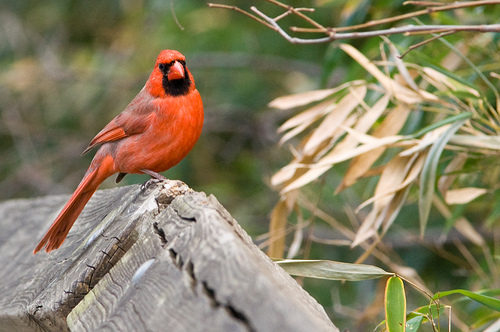

In [35]:
input_image

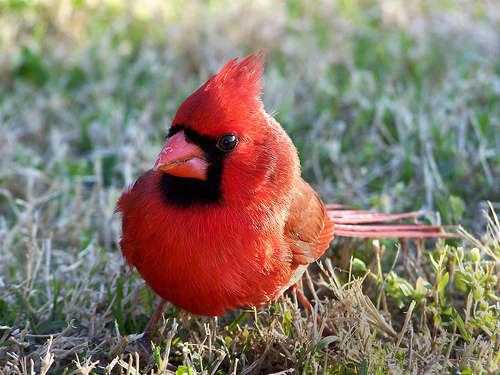

In [36]:
input_image2

### Loop Through Images

In [10]:
# load in 15 images
# abbreviationsof: bobolark, hooded warbler, indigo bunting, marsh wren, painted bunting, shiny cowbird
images = ["bl1", "bl2", "bl3","hw1","hw2", "hw3", "ib1","ib2", "ib3","mw1", "mw2", "mw3", "pb1", "pb2", "pb3", "sc1", "sc2", "sc3"]

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'
combos = list(combinations(images, 2)) #all the combinations, n choose 2

In [ ]:
# Calculate cosine similarity for all pairs in correct order


In [ ]:
def plot_images(img_a, img_b):
# displays images a and b
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_a);
    ax[0].axis('off')
    ax[1].imshow(img_b);
    ax[1].axis('off')
    return

for i in range(0,len(combos)):
    img_a = mpimg.imread(path+combos[i][0]+".jpg")
    img_b = mpimg.imread(path+combos[i][1]+".jpg")
    plot_images(img_a, img_b)
#    plt.savefig("ImagePairs/" + combos[i][0] + "_" + combos[i][1] + ".jpg", bbox_inches='tight')

In [4]:
import os
os.getcwd()

'/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings'

### CHANGING THE CLASS

In [43]:
# TESTING GITHUB CODE

# Copyright 2020 Lorna Authors. All Rights Reserved.
# Licensed under the Apache License, Version 2.0 (the "License");
#   you may not use this file except in compliance with the License.
#   You may obtain a copy of the License at
#
#       http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

""" From pytorch official website """
import warnings
from collections import namedtuple

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from torch.jit.annotations import Optional, Tuple

from ipynb.fs.full.utils import get_model_params
from ipynb.fs.full.utils import googlenet_params
from ipynb.fs.full.utils import load_pretrained_weights

GoogLeNetOutputs = namedtuple(
    'GoogLeNetOutputs', ['logits', 'aux_logits2', 'aux_logits1'])
GoogLeNetOutputs.__annotations__ = {'logits': Tensor, 'aux_logits2': Optional[Tensor],
                                    'aux_logits1': Optional[Tensor]}

# Script annotations failed with _GoogleNetOutputs = namedtuple ...
# _GoogLeNetOutputs set here for backwards compat
_GoogLeNetOutputs = GoogLeNetOutputs


class GoogLeNet(nn.Module):
    __constants__ = ['aux_logits', 'transform_input']

    def __init__(self, global_params=None):
        super(GoogLeNet, self).__init__()

        if global_params.blocks is None:
            blocks = [BasicConv2d, Inception, InceptionAux]
        assert len(blocks) == 3
        conv_block = blocks[0]
        inception_block = blocks[1]
        inception_aux_block = blocks[2]

        self.aux_logits = global_params.aux_logits
        self.transform_input = global_params.transform_input

        self.conv1 = conv_block(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, ceil_mode=True)
        self.conv2 = conv_block(64, 64, kernel_size=1)
        self.conv3 = conv_block(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception3a = inception_block(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = inception_block(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = inception_block(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = inception_block(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = inception_block(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = inception_block(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = inception_block(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = inception_block(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = inception_block(832, 384, 192, 384, 48, 128, 128)

        if global_params.aux_logits:
            self.aux1 = inception_aux_block(512, global_params.num_classes)
            self.aux2 = inception_aux_block(528, global_params.num_classes)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=global_params.dropout_rate)
        self.fc = nn.Linear(1024, global_params.num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def _transform_input(self, x):
        # type: (Tensor) -> Tensor
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)
        return x

    def _forward(self, x):
        # type: (Tensor) -> Tuple[Tensor, Optional[Tensor], Optional[Tensor]]
        # N x 3 x 224 x 224
        x = self.conv1(x)
        # N x 64 x 112 x 112
        x = self.maxpool1(x)
        # N x 64 x 56 x 56
        x = self.conv2(x)
        # N x 64 x 56 x 56
        x = self.conv3(x)
        # N x 192 x 56 x 56
        x = self.maxpool2(x)

        # N x 192 x 28 x 28
        x = self.inception3a(x)
        # N x 256 x 28 x 28
        x = self.inception3b(x)
        # N x 480 x 28 x 28
        x = self.maxpool3(x)
        # N x 480 x 14 x 14
        x = self.inception4a(x)
        # N x 512 x 14 x 14
        aux_defined = self.training and self.aux_logits
        if aux_defined:
            aux1 = self.aux1(x)
        else:
            aux1 = None

        x = self.inception4b(x)
        # N x 512 x 14 x 14
        x = self.inception4c(x)
        # N x 512 x 14 x 14
        x = self.inception4d(x)
        # N x 528 x 14 x 14
        if aux_defined:
            aux2 = self.aux2(x)
        else:
            aux2 = None

        x = self.inception4e(x)
        # N x 832 x 14 x 14
        x = self.maxpool4(x)
        # N x 832 x 7 x 7
        x = self.inception5a(x)
        # N x 832 x 7 x 7
        x = self.inception5b(x)
        # N x 1024 x 7 x 7

        x = self.avgpool(x)
        # N x 1024 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 1024
        x = self.dropout(x)
        x = self.fc(x)
        # N x 1000 (num_classes)
        return x, aux2, aux1

    @torch.jit.unused
    def eager_outputs(self, x, aux2, aux1):
        # type: (Tensor, Optional[Tensor], Optional[Tensor]) -> GoogLeNetOutputs
        if self.training and self.aux_logits:
            return _GoogLeNetOutputs(x, aux2, aux1)
        else:
            return x

    def extract_features(self, inputs):
        """ Returns output of the final convolution layer """
        x = self.conv1(inputs)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.maxpool2(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)
        x = self.inception4a(x)

        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)

        x = self.inception4e(x)
        x = self.maxpool4(x)
        x = self.inception5a(x)
        x = self.inception5b(x)
        
        # AUDREY ADDING TEST
        x = self.avgpool(x)
        
        
        
        return x

    def forward(self, x):
        # type: (Tensor) -> GoogLeNetOutputs
        x = self._transform_input(x)
        x, aux1, aux2 = self._forward(x)
        aux_defined = self.training and self.aux_logits
        if torch.jit.is_scripting():
            if not aux_defined:
                warnings.warn("Scripted GoogleNet always returns GoogleNetOutputs Tuple")
            return GoogLeNetOutputs(x, aux2, aux1)
        else:
            return self.eager_outputs(x, aux2, aux1)

    @classmethod
    def from_name(cls, model_name, override_params=None):
        cls._check_model_name_is_valid(model_name)
        global_params = get_model_params(model_name, override_params)
        return cls(global_params)

    @classmethod
    def from_pretrained(cls, model_name, num_classes=1000):
        model = cls.from_name(model_name, override_params={"num_classes": num_classes})
        load_pretrained_weights(model, model_name, load_fc=(num_classes == 1000))
        return model

    @classmethod
    def get_image_size(cls, model_name):
        cls._check_model_name_is_valid(model_name)
        _, _, _, res = googlenet_params(model_name)
        return res

    @classmethod
    def _check_model_name_is_valid(cls, model_name):
        """ Validates model name. None that pretrained weights are only available for
        the first four models (googlenet) at the moment. """
        valid_model = ['googlenet']
        if model_name not in valid_model:
            raise ValueError('model_name should be one of: ' + ', '.join(valid_model))


class Inception(nn.Module):
    __constants__ = ['branch2', 'branch3', 'branch4']

    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj,
                 conv_block=None):
        super(Inception, self).__init__()
        if conv_block is None:
            conv_block = BasicConv2d
        self.branch1 = conv_block(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            conv_block(in_channels, ch3x3red, kernel_size=1),
            conv_block(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            conv_block(in_channels, ch5x5red, kernel_size=1),
            conv_block(ch5x5red, ch5x5, kernel_size=3, padding=1)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1, ceil_mode=True),
            conv_block(in_channels, pool_proj, kernel_size=1)
        )

    def _forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        outputs = [branch1, branch2, branch3, branch4]
        return outputs

    def forward(self, x):
        outputs = self._forward(x)
        return torch.cat(outputs, 1)


class InceptionAux(nn.Module):

    def __init__(self, in_channels, num_classes, conv_block=None):
        super(InceptionAux, self).__init__()
        if conv_block is None:
            conv_block = BasicConv2d
        self.conv = conv_block(in_channels, 128, kernel_size=1)

        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        # aux1: N x 512 x 14 x 14, aux2: N x 528 x 14 x 14
        x = F.adaptive_avg_pool2d(x, (4, 4))
        # aux1: N x 512 x 4 x 4, aux2: N x 528 x 4 x 4
        x = self.conv(x)
        # N x 128 x 4 x 4
        x = torch.flatten(x, 1)
        # N x 2048
        x = F.relu(self.fc1(x), inplace=True)
        # N x 1024
        x = F.dropout(x, 0.7, training=self.training)
        # N x 1024
        x = self.fc2(x)
        # N x 1000 (num_classes)

        return x


class BasicConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)


In [31]:
# WITH GITHUB ADJUSTED CODE
def get_sim_googlenet(path1, path2):
    
    #from PIL import Image
    #import torch.nn as nn
    from scipy.spatial.distance import cosine
    #import torch
    #from googlenet_pytorch import GoogLeNet
    
    # establish pretrained model
    model = GoogLeNet.from_pretrained('googlenet')
    
    # Open Image
    #input_image = Image.open('/Images/Cardinal_0010_18894.jpg')
    path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'
    input_image = Image.open(path+path1)
    input_image2 = Image.open(path+path2)

    # Resize and preprocess image
    from torchvision import transforms

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # creating minibatch for model
    input_tensor2 = preprocess(input_image2)
    input_batch2 = input_tensor2.unsqueeze(0) # creating minibatch for model

    # calculate features
    features1 = model.extract_features(input_batch)
    features2 = model.extract_features(input_batch2)
    
    # convert to numpy to use cosine function
    l_features1 = features1.detach().numpy()
    l_features2 = features2.detach().numpy()
    
    # calculate cosine similiarity
    sim = 1-cosine(l_features1,l_features2)
    #return l_features1.shape, l_features2.shape
    return sim

In [34]:
path_1 = 'bl1.jpg'
path_2 = 'bl2.jpg'
get_sim_googlenet(path_1,path_2)

Loaded pretrained weights for googlenet


0.9978834390640259

In [38]:
# calcualte similiarity ratings from googlenet for all 105 pairs
# load in 15 images
# abbreviationsof: bobolark, hooded warbler, indigo bunting, marsh wren, painted bunting, shiny cowbird
images = ["bl1", "bl2", "bl3","hw1","hw2", "hw3", "ib1","ib2", "ib3","mw1", "mw2", "mw3", "pb1", "pb2", "pb3", "sc1", "sc2", "sc3"]


# read images
path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'
combos = list(combinations(images, 2)) #all the combinations, n choose 2

sim_googlenet = []

for i in range(0,len(combos)):
    img_a = combos[i][0]+".jpg"
    img_b = combos[i][1]+".jpg"
    
    sim_googlenet.append(get_sim_googlenet(img_a, img_b))
    
sim_googlenet

Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet
Loaded pretrained weights for googlenet


[0.9978834390640259,
 0.997936487197876,
 0.9976956844329834,
 0.9979581236839294,
 0.9976934790611267,
 0.9980303049087524,
 0.9980729222297668,
 0.9980927109718323,
 0.9978497624397278,
 0.9980085492134094,
 0.9979216456413269,
 0.9980629682540894,
 0.99798983335495,
 0.9978905916213989,
 0.9980606436729431,
 0.9979430437088013,
 0.9977983832359314,
 0.9979677200317383,
 0.9976388216018677,
 0.9978427886962891,
 0.9976115822792053,
 0.9979840517044067,
 0.9980641007423401,
 0.9980365037918091,
 0.9977757930755615,
 0.998049259185791,
 0.998162031173706,
 0.9978777170181274,
 0.9979516267776489,
 0.9978481531143188,
 0.9980321526527405,
 0.9979103803634644,
 0.9978129863739014,
 0.997809886932373,
 0.9979444742202759,
 0.9977167248725891,
 0.9980438351631165,
 0.998142659664154,
 0.9981168508529663,
 0.9981169104576111,
 0.9980826377868652,
 0.9980608224868774,
 0.9979576468467712,
 0.9982280731201172,
 0.9979802370071411,
 0.9979840517044067,
 0.9980172514915466,
 0.9980144500732422,

https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c

In [8]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

In [9]:
# Load the pretrained model
model = models.googlenet(pretrained=True)
# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

In [10]:
# Set model to evaluation mode
model.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [11]:
# Open Image
#input_image = Image.open('/Images/Cardinal_0010_18894.jpg')
input_image = Image.open('/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Images/Cardinal_0010_18894.jpg')
input_image2 = Image.open('/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Images/Cardinal_0014_17389.jpg')

# Resize and preprocess image
#from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # creating minibatch for model

input_tensor2 = preprocess(input_image2)
input_batch2 = input_tensor2.unsqueeze(0) # creating minibatch for model

In [12]:
def copy_data (m,i,o):
    my_embedding.copy_(o.data)
    
my_embedding = torch.zeros(1024)
my_embedding.shape

torch.Size([1024])

In [13]:
layer.register_forward_hook(copy_data).remove()

In [14]:
model(input_batch).shape

torch.Size([1, 1000])

In [15]:
model(input_batch).flatten(0).shape

torch.Size([1000])

# using pytorch cosine similarity
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
cos_sim = cos(model(input_batch).flatten(0),model(input_batch2).flatten(0))
cos_sim

In [16]:
from scipy.spatial.distance import cosine

l_features1 = model(input_batch).detach().numpy()
l_features2 = model(input_batch2).detach().numpy()

# calculate cosine similiarity
sim = 1-cosine(l_features1,l_features2)
sim

0.6237348914146423

In [17]:
l_features1.shape

(1, 1000)

In [18]:
def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = preprocess(img)
    t_img = t_img.unsqueeze(0)
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    # my_embedding = torch.zeros(1024)
    my_embedding = torch.zeros(1024)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data)
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding

In [19]:
pic_one = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Images/Cardinal_0010_18894.jpg'
pic_two = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Images/Cardinal_0014_17389.jpg'

pic_one_vector = get_vector(pic_one)
pic_two_vector = get_vector(pic_two)

## Computing Cosine Similarity (GoogLeNet - Old)

In [93]:
def get_sim_googlenet(path1, path2):
    
    #from PIL import Image
    #import torch.nn as nn
    from scipy.spatial.distance import cosine
    #import torch
    #from googlenet_pytorch import GoogLeNet
    
    # establish pretrained model
    model = models.googlenet(pretrained=True)
    
    layer = model._modules.get('avgpool')
    
    # set model to evaluation mode
    model.eval()
    
    # Open Image
    #input_image = Image.open('/Images/Cardinal_0010_18894.jpg')
    path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'
    input_image = Image.open(path+path1)
    input_image2 = Image.open(path+path2)

    # Resize and preprocess image
    from torchvision import transforms

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # creating minibatch for model
    input_tensor2 = preprocess(input_image2)
    input_batch2 = input_tensor2.unsqueeze(0) # creating minibatch for model

    # calculate features
    features1 = model(input_batch)
    features2 = model(input_batch2)
    
    # convert to numpy to use cosine function
    l_features1 = features1.detach().numpy()
    l_features2 = features2.detach().numpy()
    
    # calculate cosine similiarity
    sim = 1-cosine(l_features1,l_features2)
    #return l_features1.shape, l_features2.shape
    return sim

In [101]:
# calcualte similiarity ratings from googlenet for all 105 pairs
# load in 15 images
# abbreviationsof: bobolark, hooded warbler, indigo bunting, marsh wren, painted bunting, shiny cowbird
images = ["bl1", "bl2", "bl3","hw1","hw2", "hw3", "ib1","ib2", "ib3","mw1", "mw2", "mw3", "pb1", "pb2", "pb3", "sc1", "sc2", "sc3"]


# read images
path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'
combos = list(combinations(images, 2)) #all the combinations, n choose 2

sim_googlenet = []
ls_comb = []

gnet = {}

for i in range(0,len(combos)):
    img_a = combos[i][0]+".jpg"
    img_b = combos[i][1]+".jpg"
    ls_comb.append(combos[i])
    
    sim_googlenet.append(get_sim_googlenet(img_a, img_b))
    
    
    
sim_googlenet

[0.6442126035690308,
 0.5605440735816956,
 0.1562293916940689,
 0.3237800598144531,
 0.2085714489221573,
 0.15632161498069763,
 0.182289719581604,
 0.18199186027050018,
 0.236775204539299,
 0.27852776646614075,
 0.30392301082611084,
 0.08477555215358734,
 0.08833437412977219,
 0.19800306856632233,
 0.6568689942359924,
 0.598023533821106,
 0.45612776279449463,
 0.593102216720581,
 0.1948653906583786,
 0.4155339300632477,
 0.36865469813346863,
 0.16989421844482422,
 0.27885952591896057,
 0.17689071595668793,
 0.31870660185813904,
 0.4045538008213043,
 0.4009348154067993,
 0.18123790621757507,
 0.16173863410949707,
 0.21581093966960907,
 0.5041993260383606,
 0.4410984218120575,
 0.33132296800613403,
 0.3417554795742035,
 0.37776169180870056,
 0.28043797612190247,
 0.3513129949569702,
 0.2187165766954422,
 0.2083672136068344,
 0.5024205446243286,
 0.4549295902252197,
 0.4018290638923645,
 0.3307126462459564,
 0.2197851836681366,
 0.30775710940361023,
 0.3957939147949219,
 0.589208722114563

In [102]:
max(sim_googlenet)

0.8565845489501953

In [103]:
min(sim_googlenet)

-0.023870054632425308

In [104]:
np.mean(sim_googlenet)

0.3212757075290664

In [105]:
sim_googlenet.index(max(sim_googlenet))

138

In [106]:
ls_comb[138]

('pb1', 'pb2')

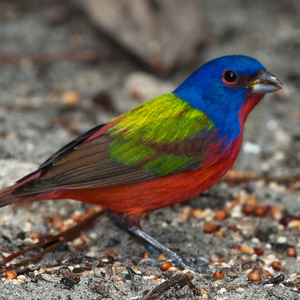

In [107]:
Image.open('/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/pb1.jpg')

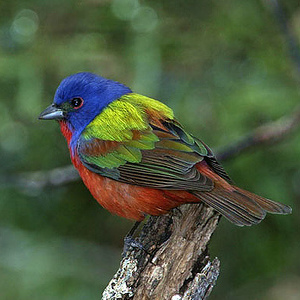

In [108]:
Image.open('/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/pb2.jpg')

In [ ]:
li = []

for i in range(18):
    li.append()

In [ ]:
# WITH GITHUB ADJUSTED CODE
def get_sim_googlenet(path1, path2):
    
    #from PIL import Image
    #import torch.nn as nn
    from scipy.spatial.distance import cosine
    #import torch
    #from googlenet_pytorch import GoogLeNet
    
    # establish pretrained model
    model = models.googlenet(pretrained=True)
    
    layer = model._modules.get('avgpool')
    
    # set model to evaluation mode
    model.eval()
    
    # Open Image
    #input_image = Image.open('/Images/Cardinal_0010_18894.jpg')
    path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'
    input_image = Image.open(path+path1)
    input_image2 = Image.open(path+path2)

    # Resize and preprocess image
    from torchvision import transforms

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # creating minibatch for model
    input_tensor2 = preprocess(input_image2)
    input_batch2 = input_tensor2.unsqueeze(0) # creating minibatch for model

    # calculate features
    features1 = model(input_batch)
    features2 = model(input_batch2)
    
    # convert to numpy to use cosine function
    l_features1 = features1.detach().numpy()
    l_features2 = features2.detach().numpy()
    
    # calculate cosine similiarity
    sim = 1-cosine(l_features1,l_features2)
    #return l_features1.shape, l_features2.shape
    return sim

## Computing Similarity Matrix for Part I (GoogLeNet)

In [20]:
# get features
def get_features(path1):
    path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'
    input_image = Image.open(path+path1)
    
    # resize and preprocess image
    from torchvision import transforms
    
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # creating minibatch for model
    
    features = model(input_batch)
    
    return features

In [21]:
images = ["bl1", "bl2", "bl3","hw1","hw2", "hw3", "ib1","ib2", "ib3","mw1", "mw2", "mw3", "pb1", "pb2", "pb3", "sc1", "sc2", "sc3"]
path = '/Users/audreychu/Documents/NYU/1016 Computational Cognitive Modeling/CCM_SimilarityRatings/Selected Bird Images/'

gnet = {}
for i in range(len(images)):
    feature = get_features(images[i]+'.jpg')
    gnet.update({images[i] : feature})

In [22]:
li = []

for i in range(len(images)):
    li.append(gnet[images[i]].cpu().detach().numpy())
    
F = np.array(li)
F = np.reshape(F, (18,1000))

print(F)

[[-0.59991395 -1.0335497  -1.0159639  ... -0.43194714 -0.7737956
   0.9148326 ]
 [ 0.27822354 -0.7334003  -0.8921447  ... -1.105648   -0.3129541
   0.50221825]
 [-0.7516241  -1.3029852  -1.1998289  ... -0.807727    0.13330117
   0.05969378]
 ...
 [-0.19553187 -0.50044286 -0.52340055 ... -1.0676931   0.76508605
  -0.02152187]
 [-0.31019595 -1.1189066  -0.6698488  ... -0.870679    0.02597281
  -0.02501833]
 [-0.19554871 -0.5590801  -1.2987195  ...  0.21187785  1.4316801
  -1.3223212 ]]


In [ ]:
OrigSimMat = F.dot(F.transpose())
OrigSimMat = np.reshape(OrigSimMat, (324))
print(OrigSimMat)

In [26]:
model = np.savetxt("googlenet_mat.csv", F, delimiter=",")

In [25]:
F.shape

(18, 1000)

## Computing Adapted Similarity Matrix for Part I (GoogLeNet + Human)

In [24]:
OrigSimMat.shape

(324,)

In [1]:
from model_hum_corr import *

In [2]:
model = 'googlenet_mat.csv'
human_mat = 'caffe_net/avg_hum_ratings.csv'

In [3]:
calc_corr(model,human_mat)

(0.4149025865147499, 0.897631022085339)